# <span style="color:blue"> Further Immproving ML Pipeline II: Assignment V </span>

## Libraries & Helper Function

In [2]:
import pandas as pd
import seaborn as sns
import warnings
import numpy as np
import scipy as sp
import graphviz 
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from IPython.display import display

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.preprocessing import normalize, scale
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, OrthogonalMatchingPursuit, RandomizedLogisticRegression
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Helper Function
import MLPreprocess_helper as mh
import MLClassifier_helper as cl

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Import Data
filepath = "data/projects_2012_2013.csv"
df = mh.import_data(filepath)

## II A: Explore Features

Bird' s eye view of how the data looks like. 
Customised by variable type

Broad level data exploration on: 
- Feature Summary (describe)
- Compartiive feature distribution (bxoplot)


'Feature Summary:'

,school_ncesid,school_latitude,school_longitude,total_price_including_optional_support,students_reached
count,1.157430e+05,124976.000000,124976.000000,124976.000000,124917.000000
mean,2.448448e+11,36.827284,-95.859299,654.011811,95.445760
std,1.644728e+11,4.963669,18.392876,1098.015854,163.481912
min,1.000050e+10,18.249140,-171.690554,92.000000,1.000000
25%,6.344101e+10,33.872504,-117.806418,345.810000,23.000000
50%,2.200870e+11,36.617410,-90.101563,510.500000,30.000000
75%,3.704880e+11,40.676156,-80.713740,752.960000,100.000000
max,6.100010e+11,65.672562,-66.628036,164382.840000,12143.000000


Individual Feature Distribution I: Birds Eye


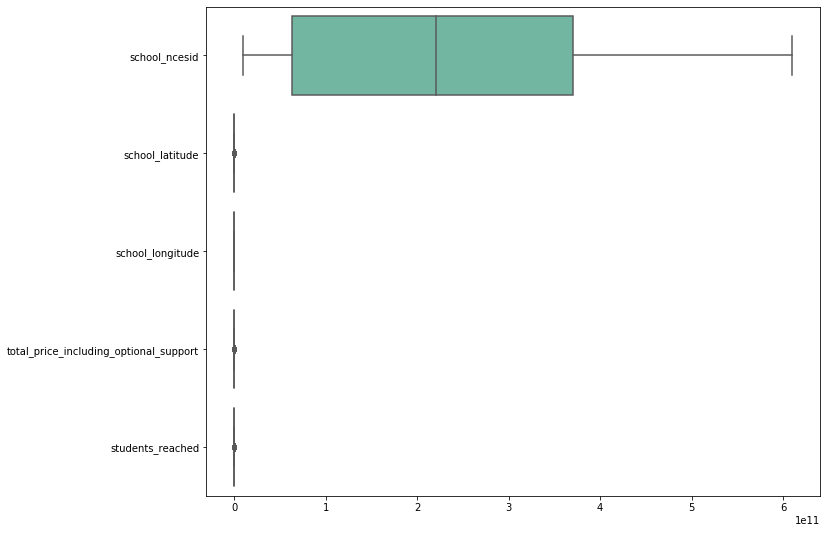

In [5]:
# Data Exploration: Stage I
mh.explore_features(df)

## II B: Explore Features (categorical)

Bird' s eye view of how the data looks like. 
Broad level data exploration on: 
- Categorical Variables (histograms)

Number of Projects: 124976
Number of Schools: 29947
Number of Teachers: 77013
Number of Cities: 5955
Number of School Districts: 5970
Approximately 1 school district per city


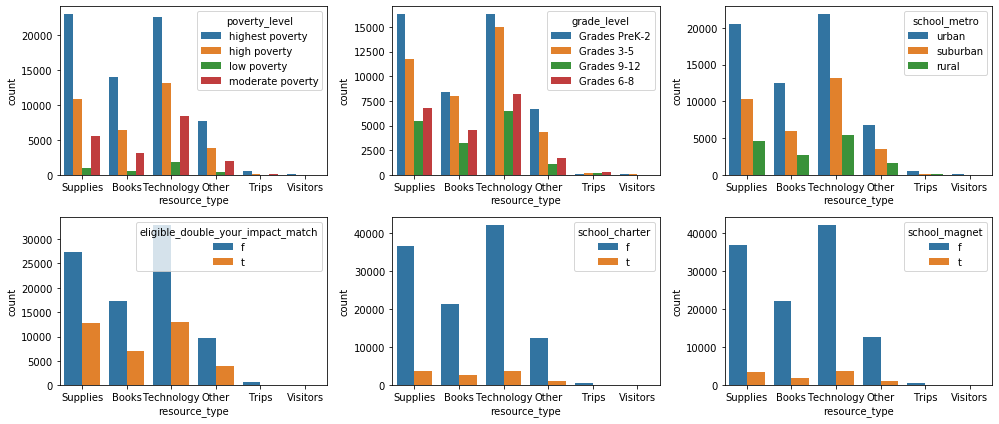

In [4]:
# Specify dtypes
cat_var = ['school_city', 'school_state','school_metro', 'school_district', 'school_county', 'school_charter',
       'school_magnet', 'teacher_prefix', 'primary_focus_subject','primary_focus_area', 'secondary_focus_subject',
        'secondary_focus_area','resource_type', 'poverty_level', 'grade_level','eligible_double_your_impact_match']
cont_var = ['total_price_including_optional_support', 'students_reached']
date_var = ['date_posted', 'datefullyfunded']

# Categorical Summary
print('Number of Projects:',df['projectid'].nunique())
print('Number of Schools:',df['schoolid'].nunique())
print('Number of Teachers:',df['teacher_acctid'].nunique())
print('Number of Cities:',df['school_city'].nunique())
print('Number of School Districts:',df['school_district'].nunique())

# Plot
f, axes = plt.subplots(2, 3, figsize=(14, 6))
f.subplots_adjust(hspace=0.4, wspace=0.4)
ax = sns.countplot(x="resource_type", hue="poverty_level", data=df, ax=axes[0, 0])
ax = sns.countplot(x="resource_type", hue="grade_level", data=df, ax=axes[0, 1])
ax = sns.countplot(x="resource_type", hue="school_metro", data=df, ax=axes[0, 2])
ax = sns.countplot(x="resource_type", hue="eligible_double_your_impact_match", data=df, ax=axes[1, 0])
ax = sns.countplot(x="resource_type", hue="school_charter", data=df, ax=axes[1, 1])
ax = sns.countplot(x="resource_type", hue="school_magnet", data=df, ax=axes[1, 2])
# f.suptitle('Demand of Resource Type: comparison')
plt.tight_layout()
print('Approximately 1 school district per city')

## II C: Explore Features (date/time)

Broad level data exploration on: 
- Donation response time
- Total Price Including and Excludiong Optional Support

Text(0.5, 1.0, 'Donation Response time')

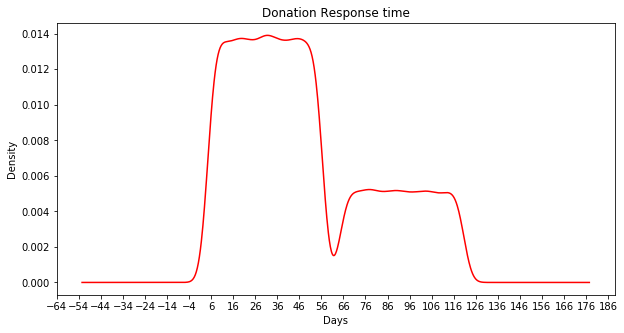

In [5]:
# Convert to Date
date_var = ['date_posted', 'datefullyfunded']
df = mh.trnf_dtype(df, var_list=date_var, to_type='date')
df['resp_time'] = df['datefullyfunded'] - df['date_posted']

# Plot donation completion distribution
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax = (df['resp_time'] / np.timedelta64(1, 'D')).plot.kde(color='r')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 10))
ax.set_xlabel("Days")
ax.set_title("Donation Response time")
# fig.savefig('/charts/donation_response_time.png')

Text(0.5,1,'Total Price Including Optional Support by Year, Month')

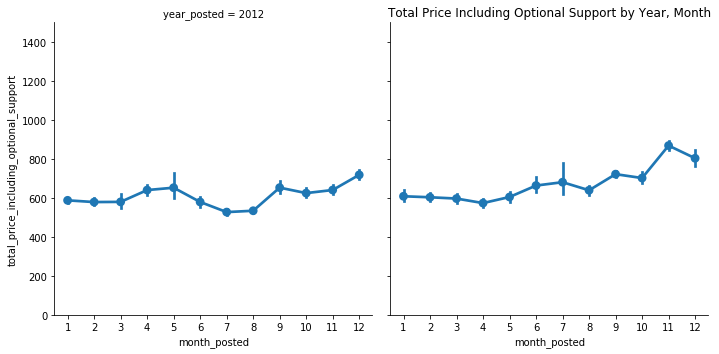

In [7]:
# Observe trends across months
df['month_posted'] = df['date_posted'].dt.month
df['year_posted'] = df['date_posted'].dt.year

# Total Price Including Support
sns.factorplot(x='month_posted', y ='total_price_including_optional_support', col='year_posted', data=df)
plt.ylim(0,1500)
plt.title('Total Price Including Optional Support by Year, Month')

## III: Explore Feature Interactions

Explore feature interactions amongst each other. Helps in weeding verbose (highly correlated variables). Evaluated through
- Correlation heatmap
- Pairwsie plots for continous attributes  


Pairwise Feature Distribution: Variable Histograms
Pairwise Feature Distribution: Pairplot


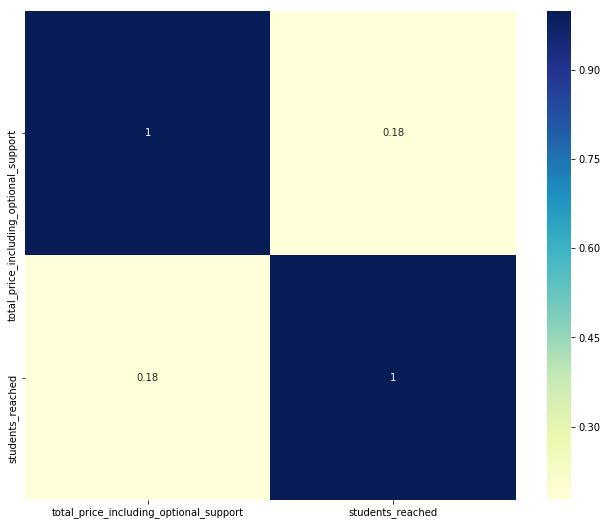

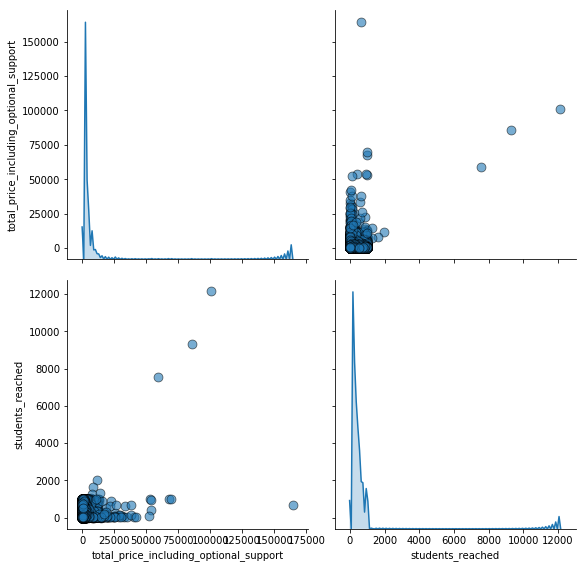

In [8]:
# Data Exploration: Pairwise
cont_var = ['total_price_including_optional_support', 'students_reached']
df = mh.trnf_dtype(df, var_list=cont_var, to_type='cont')
mh.explore_finteractions(df, cont_var)

## <span style="color:red"> Pit Stop: Observations from School Donors Data </span>

Following quick observation may be drawn for data on 124 thousand project proposal over 2 years.

- Multi-modal Dononation response time stands out 
    - particularly the drop in number of donations for around 60days
    - this implies that most of funding were done within this window and therefore we can expect a baseline in our model

- Relatively higher contribution in supplies & technology
    - relatively higher overall donation in urban areas
    - higher donation made in high poverty schools
    - higher donations made in pre-K2 grades

- Total pricing and students reached attributes show a near *Gamma* distribution
    - which *supports* trying a non-parametric/Machine learning based method
    - conventional regression frameworks (in some cases even GLMM) might be inept in accurately extracting variance in such cases
    - pairwise correlation between them can be indicative of more the students reached more donation made 

- Average Monhtly Funding (with support) aorund $400-$500, without much seasonal variation. 
- Sizebale outliers, particular to the range of over $1500K in November 2013

Caveat
+ *A caevat of the given process is not discerning categorical and continous variables. It is likely that the given datasets might have mispscified/unusable data types. So, it helpful to in the first stage throw in the variables alltogether and use these results to understand the nature and use of these feature for the subjective analysis, expeditiously* 

## IV: Feature Engeneering

### Variable Treatment 
- Missing Value
- Dummy Variable 
- Binary Bins
- Normalising outlier distribution
- Create features

The following section identifies variables under these heads.
The training data in the model would be modified dynamically during model run

### Missing Values

- View a summery of missing proportion by columns 
- Replace missing values by mean/median as specified
    - specify mean=False for median
Caveat
+ *Missing data can be present in different forms based on data or file type (na, null, NA ,NaN :0/0 forms, '.'). Getting a sense of meaning of the feature & format of the file type is helpfu. E.g. Stata uses '.', R uses 'NA' *

In [6]:
# Get Missing Data Summary
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print('Missing data summary', display(missing_data.head(20)))

# Identified parameters for training data
missing_var = ['students_reached']

,Total,Percent
secondary_focus_subject,40556,0.324510
secondary_focus_area,40556,0.324510
school_metro,15224,0.121815
school_ncesid,9233,0.073878
school_district,172,0.001376
students_reached,59,0.000472
resource_type,17,0.000136
primary_focus_area,15,0.000120
primary_focus_subject,15,0.000120
grade_level,3,0.000024


Missing data summary None


### Missing treatment summary
59 missing values student_reached treated by mean replacement. 
Ideally, given the right skewed distribution mean is not recommended, but the missing % is less than 0.001% of data
Rest missing in categorical variable. Not imputing as of now, can use hot deck or association rules if required.

### Generate features

In [7]:
# Correspondence Hierarchy
# Identifying criteria for focus area vs subject 
print(df.groupby(['primary_focus_area',"primary_focus_subject"]).size())
print(df.groupby(['secondary_focus_area',"secondary_focus_subject"]).size())
# Given cocurrence, choosing to keep subject rather than area

# Identifying criteria for focus area vs subject 
print(df.groupby(['school_city']).size().sort_values(ascending=False).head(10))
# treat larger cities separately: based on their potential to signal
maj_cities = df.groupby(['school_city']).size().sort_values(ascending=False).head(10)

# Also developing features based on teacher's gender {clubbing 2 separate cat might help}
# Parsing from teacher prefix
print(df.groupby(['teacher_prefix']).size())

primary_focus_area   primary_focus_subject
Applied Learning     Character Education       2249
                     College & Career Prep     1217
                     Community Service          221
                     Early Development         2618
                     Extracurricular            480
                     Other                     1809
                     Parent Involvement         128
Health & Sports      Gym & Fitness             1281
                     Health & Wellness         1450
                     Nutrition                  190
                     Sports                     574
History & Civics     Civics & Government        428
                     Economics                  491
                     History & Geography       2701
                     Social Sciences           1538
Literacy & Language  ESL                       1604
                     Foreign Languages          898
                     Literacy                 37408
                     

### Dummy labels for categorial features

In [8]:
# Identified Parameters for training data
dum_var = ['school_district','school_city','school_metro','teacher_prefix','primary_focus_subject','school_county',
           'primary_focus_subject','secondary_focus_subject','resource_type','poverty_level','grade_level']

### Binary bins

In [9]:
# Identified Parameters for training data
bin_var = ['eligible_double_your_impact_match','school_charter','school_magnet']

### Normalising outlier distribution

In [10]:
# Identified Parameters for training data
norm_var = ['total_price_including_optional_support', 'students_reached']

### Outliers/Dropping variables 
No strong pairwise correlation leading to a multinollinearity like situation.There might be correlation between total price and students reached, if outliers are removed, but considering the outliers value as part of sample for now. 

#### Note on Outliers
NOTE: *Treating outliers did not seem particularly useful for the data in question. Outliers in donation and students are plausible. If however required Z-scaores are a good way to examine individual feature distirbutions.*
`from scipy import stats
z1 = np.abs(stats.zscore(df))
z = np.abs(stats.zscore(df_c))`
One can further apply a threshold on the Z-value to filter our outlier.

In [14]:
# Test Running
# xtr = cl.feature_eng(df, missing_var, cat_var, bin_var, norm_var, maj_cities)
#xtr.head(10)


Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_metro', 'school_district', 'school_county', 'school_charter',
       'school_magnet', 'teacher_prefix', 'primary_focus_subject',
       'primary_focus_area', 'secondary_focus_subject', 'secondary_focus_area',
       'resource_type', 'poverty_level', 'grade_level',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'date_posted', 'datefullyfunded',
       'resp_time', 'month_posted', 'year_posted'],
      dtype='object')

## <span style="color:red"> Pit Stop: Summary of variable treatment & feature engeneering </span>

- Excluding ID variables (projectid, school_ncesid)
    - there are 29947 schools and 77013 teachers overall
    - that means same teachers & schools received got multiple grants
    - can signal donation accquiring capacity

- Feature Generation I: using from prefix
    - Gender variable on teachers
    - Considered using selecting variables by qualifications: but techers with Dr's less than 1% of data

- Feature Generation II: major cities
    - Considered high frequency cities
    - Quickly googled highest frequency ones for having high population

- Hierarchial geographies: geographical identifiers (lat, long, state, county, city)
    - Multiple geographical indicators indicating same geography
    - Choosing geographical resolution
        - Proportionate to the data density choose higher resolution (but lower than lat,long)
        - Corresponding number of cities (5955) by school district (5970)
        - But given difference in rel frequency using both
        - Keeping School district as it might be a better policy indicative

- Excluding hierarchial variables 2: Focus Area vs Subject (remove focus_area)
    - Checking if focus area and focus subject have 1-1 mapping
    - No they do not
    - Retain category with higher resolution

Hierarchial variables might drain variance from each another so keeping retaining singular types

NOTE: *Instead of adding transformed variables to the same data frame, the current implementation transforms into a new dataframe to reduce steps in variable name specification in model run. This acts a check-post to avoid re-running processes from start*

# V: Finalizing Model Dataset

- Set final model variables
    - Check for any further interactions
- Target variable defined as finding funding within 60 days
- Test the model in 6 months rolling window
    - Deselect 60 days prior to the test phase beginning

Minimal base case run for constrained by KNN timing 

In [89]:
# Select Model Data
model_var = ['school_district','school_city','school_charter','school_magnet','teacher_prefix','school_county',
             'primary_focus_subject','secondary_focus_subject','resource_type','poverty_level', 'grade_level',
             'total_price_including_optional_support','students_reached','eligible_double_your_impact_match',
             'date_posted','datefullyfunded','school_metro','resp_time']
df_m = df[model_var]

In [90]:
# Based on model context
observation_period = 60 
observation_window = str(observation_period) +' days'

# progressive train on 6 month window
prediction_windows = [6,12]

# Create target label variable
df_m['fund_60day'] = (df_m['resp_time'] < observation_window).astype('int').astype('category')

# Remove label originators
df_m = df_m.drop(labels=['datefullyfunded','resp_time'], axis=1)
df_m.head()

,school_district,school_city,school_charter,school_magnet,teacher_prefix,school_county,primary_focus_subject,secondary_focus_subject,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,school_metro,fund_60day
0,Pershing Elem Network,Chicago,f,f,Mrs.,Cook,Mathematics,Visual Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,f,2013-04-14,urban,1
1,Ventura Unif School District,Ventura,f,f,Mrs.,Ventura,Civics & Government,Literature & Writing,Books,highest poverty,Grades 3-5,282.47,28.0,t,2012-04-07,urban,1
2,Los Angeles Unif Sch Dist,Los Angeles,f,f,Ms.,Los Angeles,Literacy,Social Sciences,Technology,high poverty,Grades 3-5,1012.38,56.0,f,2012-01-30,urban,0
3,New York City Dept Of Ed,Brooklyn,f,t,Ms.,Kings (Brooklyn),Literacy,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,f,2012-10-11,urban,1
4,Central Islip Union Free SD,Central Islip,f,f,Mrs.,Suffolk,Literacy,Literature & Writing,Technology,high poverty,Grades PreK-2,3591.11,150.0,f,2013-01-08,suburban,0


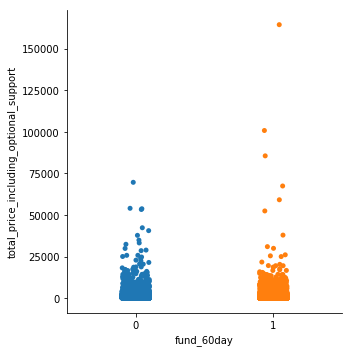

In [19]:
# Checking underfunded projects against poverty
df_m['poverty_level'].describe()
sns.catplot(x="fund_60day", y="total_price_including_optional_support", data=df_m)

# VI: Running Model
## VI.A: TestGrid -> Round I

In [13]:
# A.) Determine start and end date
start_time_date = df_m['date_posted'].min()
end_time_date = df_m['date_posted'].max()

# B.) Obtain classifier name and grid size
clfs, test_grid=cl.define_clfs_params(grid_size='test')

# C.) Specify Classifiers to run
models_to_run=['RF', 'BG', 'AB', 'LR', 'GB', 'DT', 'KNN']

# D.) Create labels/features and Split
time_var='date_posted'
pred_var='fund_60day'

train_start='2012-01-01'
train_end='2012-06-30'

test_start='2012-07-01'
test_end='2012-12-31'

### Simulation on Test Grid: Use basic guidance for trends primarily KNN

Model Selection: Running through, Linear Classifier, Tree(DT), Bagging (BG and ensemble bag RF), Boosting (Ada, GB) & Space Paritioning (chose KNN over SVM) 


training date range: 2012-01-01 00:00:00 2012-06-30 00:00:00
testing date range: 
 2012-08-29 00:00:00 2013-02-27 00:00:00

 Feature engineering module
Treating Missing Values


,Total,Percent
secondary_focus_subject,8524,0.323050
school_metro,2643,0.100167
school_district,33,0.001251
students_reached,4,0.000152
resource_type,2,0.000076
primary_focus_subject,2,0.000076
grade_level,1,0.000038
eligible_double_your_impact_match,0,0.000000
total_price_including_optional_support,0,0.000000
poverty_level,0,0.000000


Major cities dummy
Gender dummy
teacher_prefix
Mr.      3705
Mrs.    12625
Ms.     10056
dtype: int64
Creating Dummy labels for categoricals
Creating Binary labels
Normalise Skewed Variables 

(26386, 7095)

 Feature engineering module
Treating Missing Values


,Total,Percent
secondary_focus_subject,11110,0.331098
school_metro,4042,0.120459
school_district,66,0.001967
students_reached,22,0.000656
resource_type,5,0.000149
primary_focus_subject,4,0.000119
grade_level,2,0.000060
eligible_double_your_impact_match,0,0.000000
total_price_including_optional_support,0,0.000000
poverty_level,0,0.000000


Major cities dummy
Gender dummy
teacher_prefix
Mr.      4542
Mrs.    15985
Ms.     13028
dtype: int64
Creating Dummy labels for categoricals
Creating Binary labels
Normalise Skewed Variables 

(33555, 8123)
common_cols 5118
RF
---1
---2
---3
3.642868995666504 :Time for running RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
---1
---2
---3
3.2062931060791016 :Time for running RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_

---2
---3
6.390044927597046 :Time for running LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
---1
---2
---3
9.355244159698486 :Time for running LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
---1
---2
---3
7.4421162605285645 :Time for running LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
GB
---1
---2
---3
21.534187078475952 :Time for running Gr

---2
---3
4.982401132583618 :Time for running DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
---1
---2
---3
6.29009485244751 :Time for running DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
---1
---2
---3
6.214262962341309 :Time for running DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impuri

,Total,Percent
secondary_focus_subject,19564,0.330713
school_metro,6608,0.111703
school_district,92,0.001555
students_reached,4,0.000068
resource_type,2,0.000034
primary_focus_subject,2,0.000034
grade_level,1,0.000017
eligible_double_your_impact_match,0,0.000000
total_price_including_optional_support,0,0.000000
poverty_level,0,0.000000


Major cities dummy
Gender dummy
teacher_prefix
Mr.      7969
Mrs.    28191
Ms.     22997
dtype: int64
Creating Dummy labels for categoricals
Creating Binary labels
Normalise Skewed Variables 

(59157, 10092)

 Feature engineering module
Treating Missing Values


,Total,Percent
secondary_focus_subject,7749,0.321442
school_metro,3235,0.134193
students_reached,33,0.001369
school_district,20,0.000830
resource_type,10,0.000415
primary_focus_subject,9,0.000373
eligible_double_your_impact_match,0,0.000000
total_price_including_optional_support,0,0.000000
grade_level,0,0.000000
poverty_level,0,0.000000


Major cities dummy
Gender dummy
teacher_prefix
Dr.         2
Mr.      2699
Mrs.    11956
Ms.      9450
dtype: int64
Creating Dummy labels for categoricals
Creating Binary labels
Normalise Skewed Variables 

(24107, 8140)
common_cols 6288
RF
---1
---2
---3
7.679728031158447 :Time for running RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
---1
---2
---3
7.37625789642334 :Time for running RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, 

---2
---3
16.205118894577026 :Time for running LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
---1
---2
---3
22.821229934692383 :Time for running LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
---1
---2
---3
21.194865226745605 :Time for running LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
GB
---1
---2
---3
50.788296937942505 :Time for running 

---2
---3
13.999558925628662 :Time for running DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
---1
---2
---3
20.508395195007324 :Time for running DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
---1
---2
---3
19.959589958190918 :Time for running DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_im

,Total,Percent
secondary_focus_subject,26340,0.325954
school_metro,9412,0.116472
school_district,118,0.001460
students_reached,59,0.000730
resource_type,17,0.000210
primary_focus_subject,15,0.000186
grade_level,3,0.000037
eligible_double_your_impact_match,0,0.000000
total_price_including_optional_support,0,0.000000
poverty_level,0,0.000000


Major cities dummy
Gender dummy
teacher_prefix
Mr.     10567
Mrs.    38947
Ms.     31295
dtype: int64
Creating Dummy labels for categoricals
Creating Binary labels
Normalise Skewed Variables 

(80809, 11498)

 Feature engineering module
Treating Missing Values


,Total,Percent
secondary_focus_subject,10534,0.316803
school_metro,4284,0.128838
school_district,41,0.001233
eligible_double_your_impact_match,0,0.000000
students_reached,0,0.000000
total_price_including_optional_support,0,0.000000
grade_level,0,0.000000
poverty_level,0,0.000000
resource_type,0,0.000000
primary_focus_subject,0,0.000000


Major cities dummy
Gender dummy
teacher_prefix
Mr.      4523
Mrs.    15899
Ms.     12829
dtype: int64
Creating Dummy labels for categoricals
Creating Binary labels
Normalise Skewed Variables 

(33251, 8430)
common_cols 6903
RF
---1
---2
---3
13.010080099105835 :Time for running RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
---1
---2
---3
7.710059881210327 :Time for running RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_

---2
---3
22.33966612815857 :Time for running LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
---1
---2
---3
28.737454891204834 :Time for running LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
---1
---2
---3
28.64228391647339 :Time for running LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
GB
---1
---2
---3
62.99378991127014 :Time for running Gra

---2
---3
17.78953218460083 :Time for running DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
---1
---2
---3
24.911633253097534 :Time for running DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
---1
---2
---3
24.851294994354248 :Time for running DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_imp

,Total,Percent
secondary_focus_subject,19574,0.330508
school_metro,6615,0.111695
school_district,92,0.001553
students_reached,4,0.000068
resource_type,2,0.000034
primary_focus_subject,2,0.000034
grade_level,1,0.000017
eligible_double_your_impact_match,0,0.000000
total_price_including_optional_support,0,0.000000
poverty_level,0,0.000000


Major cities dummy
Gender dummy
teacher_prefix
Mr.      7978
Mrs.    28224
Ms.     23022
dtype: int64
Creating Dummy labels for categoricals
Creating Binary labels
Normalise Skewed Variables 

(59224, 10099)

 Feature engineering module
Treating Missing Values


,Total,Percent
secondary_focus_subject,18305,0.318952
school_metro,7530,0.131205
school_district,61,0.001063
students_reached,33,0.000575
resource_type,10,0.000174
primary_focus_subject,9,0.000157
eligible_double_your_impact_match,0,0.000000
total_price_including_optional_support,0,0.000000
grade_level,0,0.000000
poverty_level,0,0.000000


Major cities dummy
Gender dummy
teacher_prefix
Dr.         2
Mr.      7234
Mrs.    27854
Ms.     22301
dtype: int64
Creating Dummy labels for categoricals
Creating Binary labels
Normalise Skewed Variables 

(57391, 10828)
common_cols 7619
RF
---1
---2
---3
11.619662761688232 :Time for running RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
---1
---2
---3
11.207594871520996 :Time for running RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf

---2
---3
19.54583501815796 :Time for running LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
---1
---2
---3
26.268556118011475 :Time for running LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
---1
---2
---3
22.454248189926147 :Time for running LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
GB
---1
---2
---3
58.27722191810608 :Time for running Gr

---2
---3
16.561811923980713 :Time for running DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
---1
---2
---3
21.998863220214844 :Time for running DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
---1
---2
---3
21.887587070465088 :Time for running DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_im

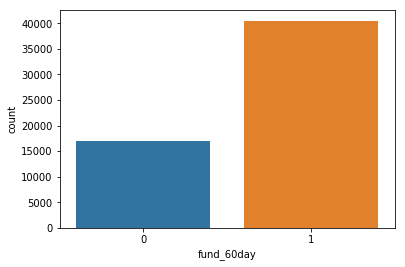

In [64]:
# Running on test_grid only to have models completed in reasonable amount of time
results_base = cl.clf_wrapper(df_m, start_time_date, end_time_date, prediction_windows, time_var,pred_var, \
                models_to_run, clfs, test_grid, missing_var, dum_var, bin_var, norm_var, maj_cities, observation_period)
results_base.to_csv("model_summary/Fund60_ClfSim_testgrd.csv")

# # One simulation run with inlcuding, running others without it 

## Analysing TestGrid Results

In [65]:
results_base.describe()

,baseline,auc-roc,a_at_5,a_at_20,a_at_50,f1_at_5,f1_at_20,f1_at_50,p_at_1,p_at_5,p_at_10,p_at_20,p_at_50,r_at_1,r_at_5,r_at_10,r_at_20,r_at_50
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,0.712403,0.616094,0.324739,0.415529,0.614701,0.114304,0.359570,0.682226,0.891766,0.871540,0.845550,0.819841,0.827113,0.012504,0.061167,0.118686,0.230332,0.580757
std,0.021783,0.040797,0.022336,0.036987,0.057679,0.013388,0.034573,0.047354,0.109268,0.102892,0.084122,0.077817,0.058447,0.001510,0.007177,0.011340,0.022469,0.041407
min,0.681088,0.499128,0.276561,0.269587,0.523653,0.070979,0.212953,0.608598,0.544503,0.536424,0.622355,0.482140,0.718825,0.007704,0.038004,0.084126,0.136655,0.516342
25%,0.699484,0.600580,0.308337,0.391397,0.581483,0.106985,0.342280,0.653949,0.825620,0.815100,0.796266,0.788248,0.787341,0.011671,0.057168,0.111724,0.218668,0.557638
50%,0.714421,0.623555,0.323261,0.420656,0.598779,0.114954,0.363411,0.669525,0.897522,0.877013,0.857434,0.825865,0.817099,0.012772,0.061599,0.119802,0.233332,0.569538
75%,0.727340,0.645633,0.344224,0.439851,0.630331,0.124268,0.381745,0.694390,1.000000,0.948857,0.904347,0.869082,0.852953,0.013521,0.066495,0.127288,0.245732,0.593159
max,0.739681,0.670338,0.368897,0.518895,0.818891,0.136745,0.453955,0.846656,1.000000,1.000000,1.000000,1.000000,1.000000,0.014678,0.073391,0.146781,0.293623,0.734089


### AUC-ROC Performance across models: compare with baseline

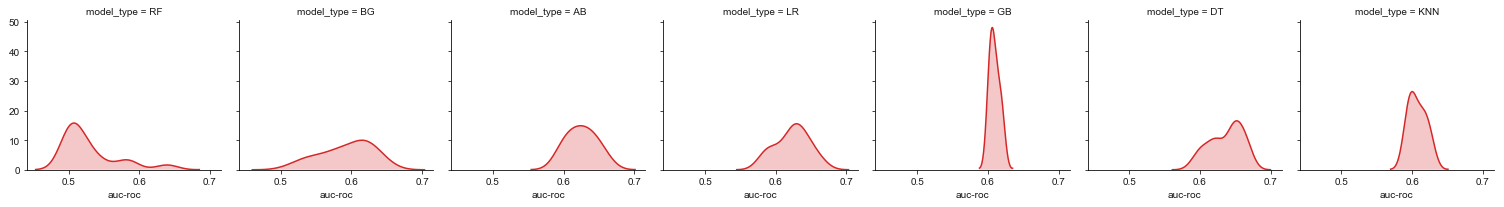

In [66]:
# Spread of Results: Model Performance by Classifier used
g = sns.FacetGrid(results_base, col='model_type', palette="Set1")
g = (g.map(sns.kdeplot, 'auc-roc', shade=True, color='tab:red'))
sns.set(rc={'figure.figsize':(20,12)})

The models with minimal parameters perform better on average than random prediction

### Precision at 5 performance across models

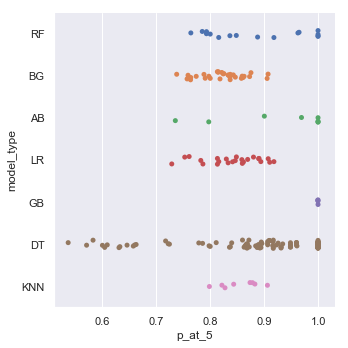

In [71]:
# Spread of Results: Precision at 5% Performance by Classifier used
sns.catplot(x="p_at_5", y="model_type", data=results_base)

### Compare Precision curve across models

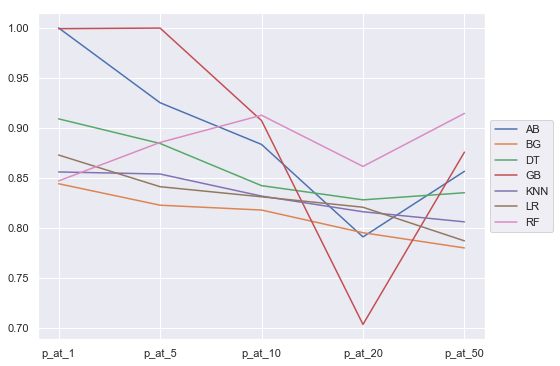

In [78]:
cl.compare_metrics(results_base, pivot_by='model_type', metric='precision')

Tesgrid is greatly restricted in parameter ranges and therefore it so higher values can considered sub-optimised fitting 

## <span style="color:red"> Pit Stop:  Models to select for tuning in round II </span>

- LR and KNN: low precision as well as timetaking
    - Call for round II: Drop LR and KNN 
- Narrow spead in GBM could be indicative of overfitting with limited paramters: this gives guidance that one must think overfitting control 
    - Call for round II: preferrence of AB over GB 
    - Increase shrinkage, learning rate as it already seems to overfit
- RF lesser noisier than DT
    - Call for round II: drop DT use RF
- Judgement: try both bagging and boosted ensemble

NOTE: 
- for RF: max_features, min_samples_split not significant to change
- Selectbestk and GridsearchCv: automate human judgement {not recommended}

## VI.B: tuning (ExpandGrid) -> Round II

### Pruning trees: expand grid size to 
Bagging
- induce more randomness in bagging
- more bootsrapped trees and variable shuffling for splits 

Boosting
- avoid overfitting 
- restricting observations range in nodes


Explore deeper into parameters than wider into models 

In [113]:
# B.) Obtain classifier name and grid size
clfs, grid=cl.define_clfs_params(grid_size='small')

# C.) Specify Classifiers to run
models_to_run=['RF','AB','GB']

training date range: 2012-01-01 00:00:00 2012-06-30 00:00:00
testing date range: 
 2012-08-29 00:00:00 2013-02-27 00:00:00

 Feature engineering module
Treating Missing Values


,Total,Percent
secondary_focus_subject,8524,0.323050
school_metro,2643,0.100167
school_district,33,0.001251
students_reached,4,0.000152
resource_type,2,0.000076
primary_focus_subject,2,0.000076
grade_level,1,0.000038
eligible_double_your_impact_match,0,0.000000
total_price_including_optional_support,0,0.000000
poverty_level,0,0.000000


Major cities dummy
Gender dummy
teacher_prefix
Mr.      3705
Mrs.    12625
Ms.     10056
dtype: int64
Creating Dummy labels for categoricals
Creating Binary labels
Normalise Skewed Variables 


 Feature engineering module
Treating Missing Values


,Total,Percent
secondary_focus_subject,11110,0.331098
school_metro,4042,0.120459
school_district,66,0.001967
students_reached,22,0.000656
resource_type,5,0.000149
primary_focus_subject,4,0.000119
grade_level,2,0.000060
eligible_double_your_impact_match,0,0.000000
total_price_including_optional_support,0,0.000000
poverty_level,0,0.000000


Major cities dummy
Gender dummy
teacher_prefix
Mr.      4542
Mrs.    15985
Ms.     13028
dtype: int64
Creating Dummy labels for categoricals
Creating Binary labels
Normalise Skewed Variables 

RF
---model fitting--

Time = 3.7027618885040283 for running:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 

---model fitting--

Time = 3.403832197189331 for running:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
    

---model fitting--

Time = 8.97300410270691 for running:
 AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=10, random_state=None) 

---model fitting--

Time = 32.21032905578613 for running:
 AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter

,Total,Percent
secondary_focus_subject,19564,0.330713
school_metro,6608,0.111703
school_district,92,0.001555
students_reached,4,0.000068
resource_type,2,0.000034
primary_focus_subject,2,0.000034
grade_level,1,0.000017
eligible_double_your_impact_match,0,0.000000
total_price_including_optional_support,0,0.000000
poverty_level,0,0.000000


Major cities dummy
Gender dummy
teacher_prefix
Mr.      7969
Mrs.    28191
Ms.     22997
dtype: int64
Creating Dummy labels for categoricals
Creating Binary labels
Normalise Skewed Variables 


 Feature engineering module
Treating Missing Values


,Total,Percent
secondary_focus_subject,7749,0.321442
school_metro,3235,0.134193
students_reached,33,0.001369
school_district,20,0.000830
resource_type,10,0.000415
primary_focus_subject,9,0.000373
eligible_double_your_impact_match,0,0.000000
total_price_including_optional_support,0,0.000000
grade_level,0,0.000000
poverty_level,0,0.000000


Major cities dummy
Gender dummy
teacher_prefix
Dr.         2
Mr.      2699
Mrs.    11956
Ms.      9450
dtype: int64
Creating Dummy labels for categoricals
Creating Binary labels
Normalise Skewed Variables 

RF
---model fitting--

Time = 7.734236001968384 for running:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 

---model fitting--

Time = 6.082431077957153 for running:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_

---model fitting--

Time = 22.470988035202026 for running:
 AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=10, random_state=None) 

---model fitting--

Time = 88.51724481582642 for running:
 AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitt

,Total,Percent
secondary_focus_subject,26340,0.325954
school_metro,9412,0.116472
school_district,118,0.001460
students_reached,59,0.000730
resource_type,17,0.000210
primary_focus_subject,15,0.000186
grade_level,3,0.000037
eligible_double_your_impact_match,0,0.000000
total_price_including_optional_support,0,0.000000
poverty_level,0,0.000000


Major cities dummy
Gender dummy
teacher_prefix
Mr.     10567
Mrs.    38947
Ms.     31295
dtype: int64
Creating Dummy labels for categoricals
Creating Binary labels
Normalise Skewed Variables 


 Feature engineering module
Treating Missing Values


,Total,Percent
secondary_focus_subject,10534,0.316803
school_metro,4284,0.128838
school_district,41,0.001233
eligible_double_your_impact_match,0,0.000000
students_reached,0,0.000000
total_price_including_optional_support,0,0.000000
grade_level,0,0.000000
poverty_level,0,0.000000
resource_type,0,0.000000
primary_focus_subject,0,0.000000


Major cities dummy
Gender dummy
teacher_prefix
Mr.      4523
Mrs.    15899
Ms.     12829
dtype: int64
Creating Dummy labels for categoricals
Creating Binary labels
Normalise Skewed Variables 

RF
---model fitting--

Time = 9.062985181808472 for running:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 

---model fitting--

Time = 9.00449800491333 for running:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
      

---model fitting--

Time = 33.30734992027283 for running:
 AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=10, random_state=None) 

---model fitting--

Time = 132.32190489768982 for running:
 AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitt

,Total,Percent
secondary_focus_subject,19574,0.330508
school_metro,6615,0.111695
school_district,92,0.001553
students_reached,4,0.000068
resource_type,2,0.000034
primary_focus_subject,2,0.000034
grade_level,1,0.000017
eligible_double_your_impact_match,0,0.000000
total_price_including_optional_support,0,0.000000
poverty_level,0,0.000000


Major cities dummy
Gender dummy
teacher_prefix
Mr.      7978
Mrs.    28224
Ms.     23022
dtype: int64
Creating Dummy labels for categoricals
Creating Binary labels
Normalise Skewed Variables 


 Feature engineering module
Treating Missing Values


,Total,Percent
secondary_focus_subject,18305,0.318952
school_metro,7530,0.131205
school_district,61,0.001063
students_reached,33,0.000575
resource_type,10,0.000174
primary_focus_subject,9,0.000157
eligible_double_your_impact_match,0,0.000000
total_price_including_optional_support,0,0.000000
grade_level,0,0.000000
poverty_level,0,0.000000


Major cities dummy
Gender dummy
teacher_prefix
Dr.         2
Mr.      7234
Mrs.    27854
Ms.     22301
dtype: int64
Creating Dummy labels for categoricals
Creating Binary labels
Normalise Skewed Variables 

RF
---model fitting--

Time = 12.250946998596191 for running:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 

---model fitting--

Time = 12.432197332382202 for running:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_sample

---model fitting--

Time = 29.63529896736145 for running:
 AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=10, random_state=None) 

---model fitting--

Time = 112.04621005058289 for running:
 AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitt

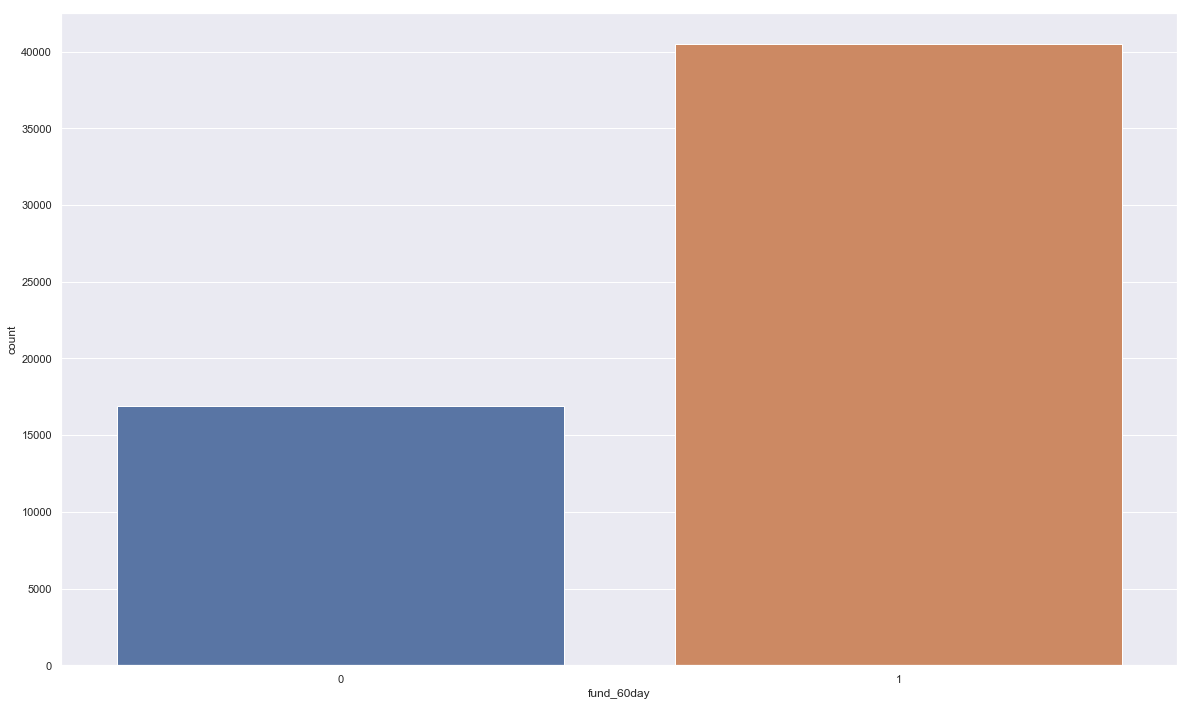

In [115]:
# Running on expanded grid 
results_expgrd = cl.clf_wrapper(df_m, start_time_date, end_time_date, prediction_windows, time_var,pred_var, \
                models_to_run, clfs, grid, missing_var, dum_var, bin_var, norm_var, maj_cities, observation_period)
# results_expgrd.to_csv("model_summary/Fund60_ClfSim_expanded_grd.csv")

In [116]:
results_expgrd.describe()

,baseline,auc-roc,a_at_5,a_at_20,a_at_50,f1_at_5,f1_at_20,f1_at_50,p_at_1,p_at_5,p_at_10,p_at_20,p_at_50,r_at_1,r_at_5,r_at_10,r_at_20,r_at_50
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.712403,0.653417,0.328648,0.435920,0.595632,0.119461,0.381853,0.666420,0.922795,0.910638,0.900304,0.870819,0.808045,0.012944,0.063928,0.126415,0.244592,0.567255
std,0.021816,0.031696,0.021238,0.026082,0.017427,0.006667,0.021717,0.014269,0.053514,0.050154,0.039986,0.050539,0.024628,0.000773,0.003605,0.005508,0.014258,0.012800
min,0.681088,0.524408,0.288958,0.282608,0.526250,0.098835,0.222946,0.607044,0.741710,0.735270,0.763900,0.514586,0.731870,0.010495,0.052919,0.105399,0.142299,0.518251
25%,0.699484,0.648870,0.309673,0.421107,0.588675,0.117438,0.378356,0.661418,0.889552,0.893972,0.884049,0.858950,0.791363,0.012588,0.062747,0.123995,0.242020,0.561191
50%,0.714421,0.659991,0.323178,0.442603,0.599835,0.121380,0.387357,0.668508,0.936087,0.923144,0.908521,0.883467,0.811893,0.013183,0.065042,0.128084,0.248839,0.571375
75%,0.727340,0.671016,0.340909,0.452354,0.606719,0.123889,0.393096,0.675138,0.964408,0.948501,0.928559,0.900791,0.829038,0.013479,0.066334,0.130489,0.252707,0.575142
max,0.739681,0.699561,0.361845,0.467375,0.626416,0.127099,0.398788,0.689696,1.000000,0.966907,0.959699,0.920451,0.843669,0.014130,0.068214,0.133504,0.255801,0.592789


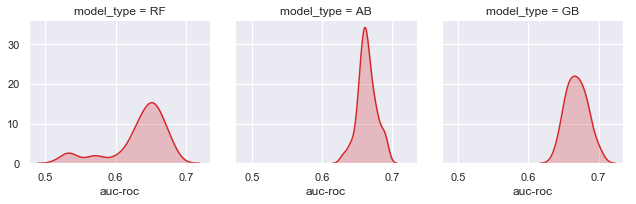

In [117]:
# Spread of Results: Model Performance by Classifier used
g = sns.FacetGrid(results_expgrd, col='model_type', palette="Set1")
g = (g.map(sns.kdeplot, 'auc-roc', shade=True, color='tab:red'))
sns.set(rc={'figure.figsize':(20,12)})

### Performance spread of the model might be particularly useful for overall fitting process across classifier types

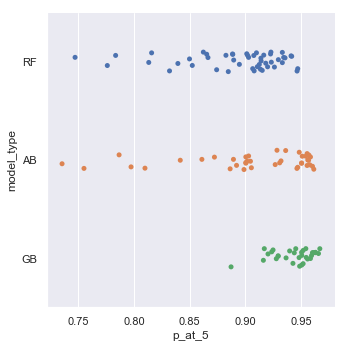

In [118]:
# Overview of Model Performance by AUC
sns.catplot(x="p_at_5", y="model_type", data=results_expgrd)

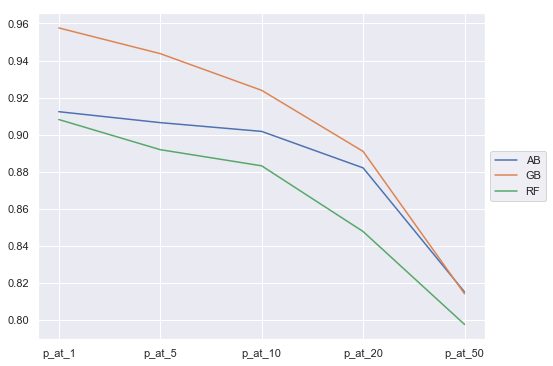

In [119]:
cl.compare_metrics(results_expgrd, pivot_by='model_type', metric='precision')

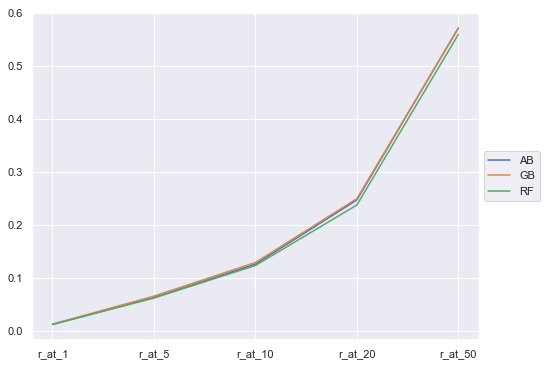

In [120]:
cl.compare_metrics(results_expgrd, pivot_by='model_type', metric='recall')

# VII: Choosing best model



### Commentary
- Based on the capacity constraint of reaching out to 5% within 60 days period, precision is most useful metric to consider. 
    - In other words, the model focuses on precisely identified the actually underfunded projects
- User-defined function for selecting best model based on specified metric {helpful to test across different time horizons}

In [14]:
# Relogging
results_expgrd=pd.read_csv('model_summary/Fund60_ClfSim_expanded_grd.csv')

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=20,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False)
Class Skewness


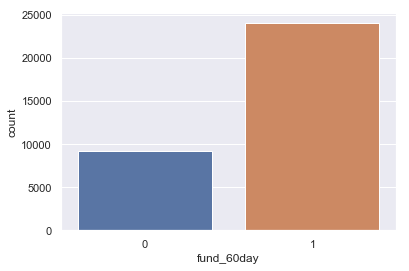


 Feature engineering module
Treating Missing Values


,Total,Percent
secondary_focus_subject,26340,0.325954
school_metro,9412,0.116472
school_district,118,0.001460
students_reached,59,0.000730
resource_type,17,0.000210
primary_focus_subject,15,0.000186
grade_level,3,0.000037
eligible_double_your_impact_match,0,0.000000
total_price_including_optional_support,0,0.000000
poverty_level,0,0.000000


Major cities dummy
Gender dummy
teacher_prefix
Mr.     10567
Mrs.    38947
Ms.     31295
dtype: int64
Creating Dummy labels for categoricals
Creating Binary labels
Normalise Skewed Variables 


 Feature engineering module
Treating Missing Values


,Total,Percent
secondary_focus_subject,10534,0.316803
school_metro,4284,0.128838
school_district,41,0.001233
eligible_double_your_impact_match,0,0.000000
students_reached,0,0.000000
total_price_including_optional_support,0,0.000000
grade_level,0,0.000000
poverty_level,0,0.000000
resource_type,0,0.000000
primary_focus_subject,0,0.000000


Major cities dummy
Gender dummy
teacher_prefix
Mr.      4523
Mrs.    15899
Ms.     12829
dtype: int64
Creating Dummy labels for categoricals
Creating Binary labels
Normalise Skewed Variables 



KeyboardInterrupt: 

In [132]:
# Evaluation Metric
stats='p_at_5' # selected
# stats='f1_at_50'# stats='auc-roc'# stats='p_at_50' 

# Window
train_date=(('2012-01-01 00:00:00'), ('2012-12-30 00:00:00')) # 1 year
test_date=(('2012-12-31 00:00:00'), ('2013-06-29 00:00:00'))  # 6 months

# Extract the best model
best_fit, mod_stat = cl.best_model(model_data=df_m, model_results=results_expgrd, time_var=time_var, 
                                   tr_date=train_date, te_date=test_date, pred_var=pred_var, m_var=missing_var, 
                                   c_var=cat_var, b_var=bin_var, n_var=norm_var, mj_cities=maj_cities,
                                   eval_stat=stats, window='best')

# VII B: Best model robustness across different windows

- Checking class imbalance first so PR make more sense
- Leverage user defined function to test

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=20,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False)
Class Skewness


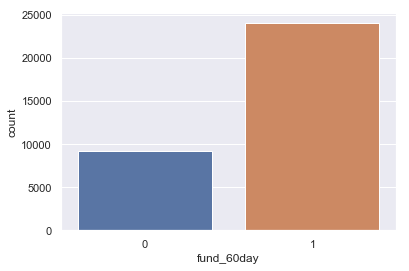


 Feature engineering module
Treating Missing Values


,Total,Percent
secondary_focus_subject,26340,0.325954
school_metro,9412,0.116472
school_district,118,0.001460
students_reached,59,0.000730
resource_type,17,0.000210
primary_focus_subject,15,0.000186
grade_level,3,0.000037
eligible_double_your_impact_match,0,0.000000
total_price_including_optional_support,0,0.000000
poverty_level,0,0.000000


Major cities dummy
Gender dummy
teacher_prefix
Mr.     10567
Mrs.    38947
Ms.     31295
dtype: int64
Creating Dummy labels for categoricals
Creating Binary labels
Normalise Skewed Variables 


 Feature engineering module
Treating Missing Values


,Total,Percent
secondary_focus_subject,10534,0.316803
school_metro,4284,0.128838
school_district,41,0.001233
eligible_double_your_impact_match,0,0.000000
students_reached,0,0.000000
total_price_including_optional_support,0,0.000000
grade_level,0,0.000000
poverty_level,0,0.000000
resource_type,0,0.000000
primary_focus_subject,0,0.000000


Major cities dummy
Gender dummy
teacher_prefix
Mr.      4523
Mrs.    15899
Ms.     12829
dtype: int64
Creating Dummy labels for categoricals
Creating Binary labels
Normalise Skewed Variables 



<Figure size 1440x864 with 0 Axes>

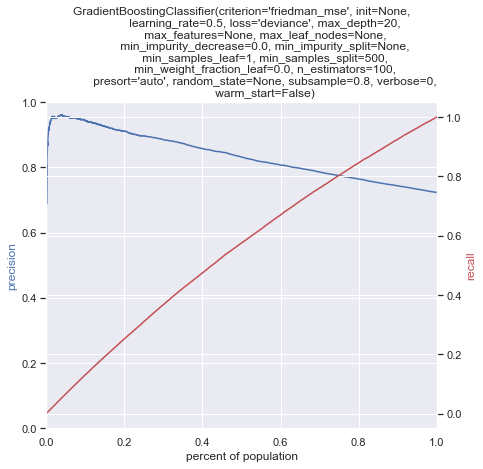

In [129]:
# Robustness across windows
stats='p_at_5' # selected

# Robustness across windows I
train_date=(('2012-01-01 00:00:00'), ('2012-12-30 00:00:00')) # 1 year
test_date=(('2012-12-31 00:00:00'), ('2013-06-29 00:00:00'))  # 6 months

# Robustness across windows II
# train_date=(('2012-01-01 00:00:00'), ('2013-06-30 00:00:00')) # 1.5 years
# test_date=(('2013-07-01 00:00:00'), ('2013-12-31 00:00:00'))  # 6 months

# Robustness across windows III
# train_date=(('2012-01-01 00:00:00'), ('2012-12-31 00:00:00')) # 2 years
# test_date=(('2013-01-01 00:00:00'), ('2013-12-31 00:00:00'))  # 1year

# Extract the best model
by_pred_probs = cl.best_model(model_data=df_m, model_results=results_expgrd, time_var=time_var, 
                               tr_date=train_date, te_date=test_date, pred_var=pred_var, m_var=missing_var, 
                               c_var=cat_var, b_var=bin_var, n_var=norm_var, mj_cities=maj_cities,eval_stat=stats)

## <span style="color:red"> Pit Stop:  Best Model Selection </span>

- Assess model via AUC-ROC spread across models
- Check precision ranges
- Pruning trees via restricting observation in nodes
- Gradient boosting shows promising signs however vulnerable to overfitting, so tested with stricter controls on parameters
- Gradient boosted model with 100 estimators, learning rate: 0.5 , max depth: 20, min sample split: 100 & subsample 0.8
	- learning rate: 0.5 not kept much lower to avoid mimicking the distribution exactly
	- max depth: 20 and min sample split: 100 both again trying to ensure that fit is close but not exact to work with different test datasets
	- subsample: 0.8, considering < 1 leads to stochastic gradient boosting, this was done to induce more randomness
- Checked best model & fit parameters across for different intertemporal horizons


# VIII Model Result & Summary

The objective of the present analysis was to prioritize which 5% of school projects should a donor prioritize their intervention on, to help with aid and assistance? Based on likely capacity constraint faced by a prospective donor (Donor’s Choose) reaching out to 5% within 60 days period, precision is most useful metric to consider. In other words, the model focuses on precisely identified the actually underfunded projects. Gradient boosted model with 100 estimators, learning rate: 0.5, max depth: 20, min sample split: 500 & subsample 0.8 performs best in this regard. The model gives sturdier prediction when trained on 1-year data and tested on 6 months window.

### NOTE: Had to create new environment due to aequitas (one day prior to deadline). Which has disabled many modules, after getting the modules working, many of codes started giving unexpected results. For instance, expected tuple output was converted to string. This has limited me to be able to work on being able to integrate config files 